In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#specify paths to analysis data
Analysis_DIR = "../AnalysisData/"

In [3]:
#load analysis data file
wm_wide = pd.read_csv(f'{Analysis_DIR}wm_wide.csv')

In [4]:
#Basic statistics of data
print('Dni od zakupu:', wm_wide['Dni od zakupu'].unique())
print('Marka:', wm_wide['Marka'].unique())
print('Wiek kupującego:', wm_wide['Wiek kupującego'].unique())
print('Płeć kupującego:', wm_wide['Płeć kupującego'].unique())
print('Ocena:', wm_wide['Ocena'].unique())

Dni od zakupu: [ 5  9 11 10  3  7  8  6  4 13  2  1 12 14 17 15]
Marka: ['Dyson' 'Beko' 'Electrolux' 'Samsung' 'Tefal']
Wiek kupującego: [45. nan 44. 40. 62. 39. 37. 18. 30. 48. 42. 35. 31. 27. 24. 52. 25. 33.
 38. 19. 36. 20. 55. 43. 28. 46. 29. 57. 34. 47. 32. 49. 56. 51. 26. 50.
 41. 53. 22. 68. 66. 23. 59. 64. 21. 54. 63. 61.]
Płeć kupującego: ['K' 'bd.' 'M']
Ocena: [2.  1.  2.5 4.  3.5 4.5 1.5 0.  3.  0.5 5. ]


## Overall description, histograms and bar charts of each variable (depends on type of value, respectively calculative or categorical)

### All variables were extracted from single original data file, named 13_WARMINSKO-MAZURSKIE.csv.

### Name: Dni od zakupu
#### Meaning: Days gone since purchases of vacuum cleaners.
#### All observations were valid - positive integers.
#### Summary statistics:

In [6]:
display(wm_wide['Dni od zakupu'].describe())

count    530.000000
mean       6.950943
std        2.685368
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       17.000000
Name: Dni od zakupu, dtype: float64

#### Histogram:

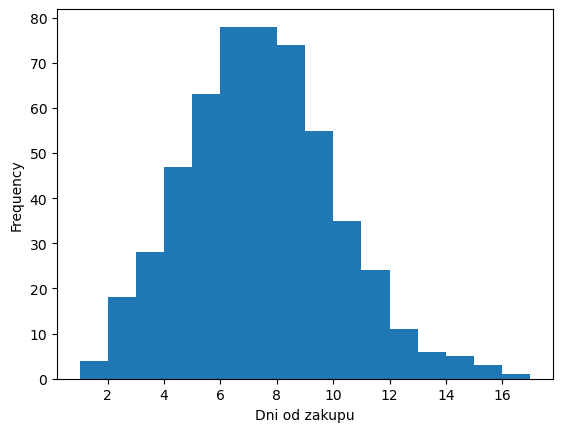

In [7]:
plt.hist(wm_wide['Dni od zakupu'], bins=wm_wide['Dni od zakupu'].max()-1)
plt.xlabel('Dni od zakupu')
plt.ylabel('Frequency')
plt.show()

### Name: Marka
#### Meaning: Brands' names of purchased vacuum cleaners.
#### All observations were valid - correct strings indicating the name.
#### Frequency table:

In [8]:
display(wm_wide['Marka'].value_counts())

Beko          161
Dyson         149
Electrolux    140
Tefal          56
Samsung        24
Name: Marka, dtype: int64

#### Bar chart:

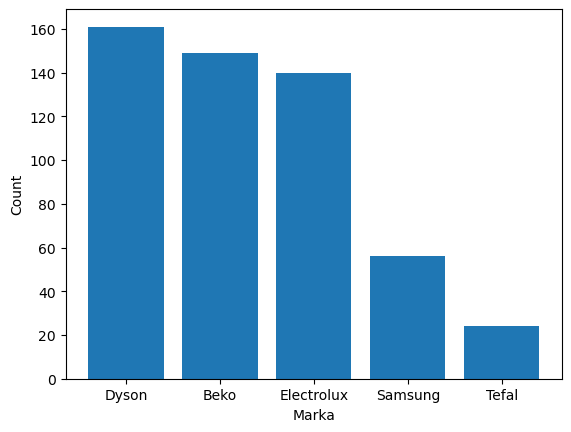

In [9]:
plt.bar(wm_wide['Marka'].unique(), height=wm_wide['Marka'].value_counts())
plt.xlabel('Marka')
plt.ylabel('Count')
plt.show()

### Name: Wiek kupującego
#### Meaning: Age of buyers.
#### Most observations were valid - positive integers, some of them were 'NaN's which indicates that several buyers haven't provided this information.
#### Summary statistics (this excludes the 'NaN' values):

In [10]:
display(wm_wide['Wiek kupującego'].describe())

count    463.000000
mean      39.390929
std        9.784722
min       18.000000
25%       33.000000
50%       39.000000
75%       46.000000
max       68.000000
Name: Wiek kupującego, dtype: float64

#### Count of 'NaN' values:

In [11]:
display(wm_wide['Wiek kupującego'].value_counts(dropna=False)[np.NaN])

67

#### Histogram including frequency of NaN value (visible as the first bin of chart):

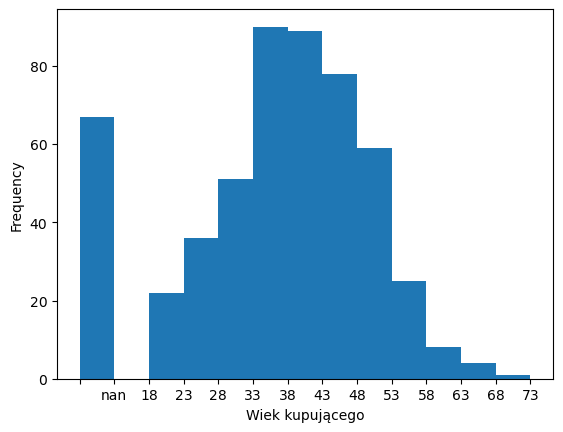

In [12]:
bin_min = int(description['Wiek kupującego']['min'])
bin_max = int(description['Wiek kupującego']['max']) + 5
bins = [bin_min - 10] + [bin_min - 5] + [i for i in range(bin_min, bin_max + 5, 5)]
n, hbins = np.histogram(wm_wide['Wiek kupującego'], bins=bins)
n[0:2] = [wm_wide['Wiek kupującego'].value_counts(dropna=False)[np.NaN], 0]
plt.hist(hbins[:-1], hbins, weights=n)
plt.xlabel('Wiek kupującego')
plt.ylabel('Frequency')
plt.xticks(ticks=bins, labels=[None] + [np.NaN] + [i for i in range(bin_min, bin_max + 5, 5)])
plt.show()

### Name: Płeć kupującego
#### Meaning: Sex of buyers.
#### All observations were valid, indicating three possible types: 'K' as female, 'M' as male and 'bd.' as no data provided.
#### Frequency table:

In [13]:
display(wm_wide['Płeć kupującego'].value_counts())

K      248
bd.    158
M      124
Name: Płeć kupującego, dtype: int64

#### Bar chart:

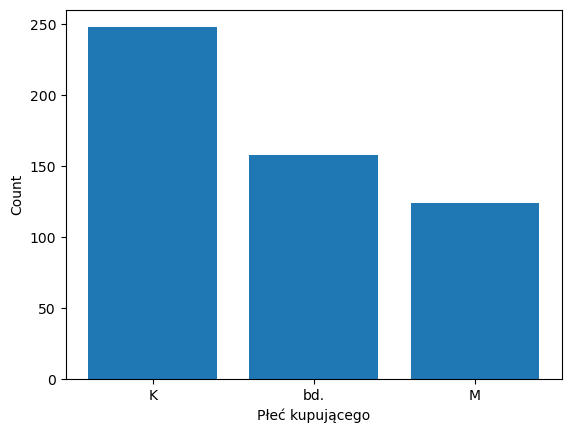

In [14]:
plt.bar(wm_wide['Płeć kupującego'].unique(), height=wm_wide['Płeć kupującego'].value_counts())
plt.xlabel('Płeć kupującego')
plt.ylabel('Count')
plt.show()

### Name: Ocena
#### Meaning: Review of purchased vacuum cleaner.
#### All observations were valid - float numbers between 0 and 5 with 0.5 step.
#### Summary statistics:

In [15]:
display(wm_wide['Ocena'].describe())

count    530.000000
mean       2.473585
std        1.052165
min        0.000000
25%        1.500000
50%        2.500000
75%        3.000000
max        5.000000
Name: Ocena, dtype: float64

#### Histogram:

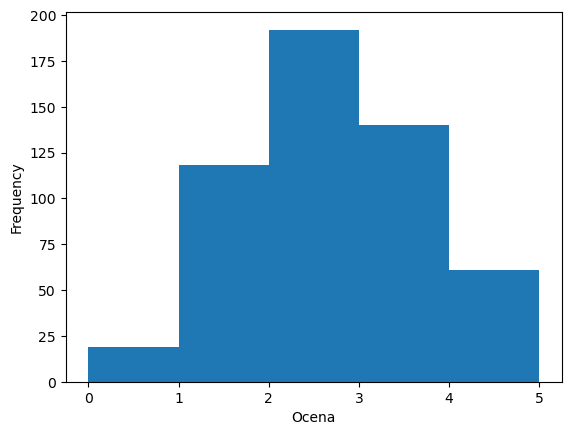

In [16]:
plt.hist(wm_wide['Ocena'], bins=int(wm_wide['Ocena'].max()))
plt.xlabel('Ocena')
plt.ylabel('Frequency')
plt.show()